In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from GeneticFeatures.GeneticFeatureGenerator import *
from GeneticFeatures.Node import *

from tester import *

In [29]:
def add(x, y):
    return x + y

def sub(x, y):
    return x - y

def mul(x, y):
    return x * y

def div(x, y):
    return x / (y + 1e-10)

def hyp(x, y):
    if isinstance(x, float) and isinstance(y, float):
        return np.hypot(x, y)
    if isinstance(x, float):
        x = np.ones_like(y) * x
    if isinstance(y, float):
        y = np.ones_like(x) * y
    return np.hypot(x, y)

def log(x, y):
    if isinstance(x, float) and isinstance(y, float):
        return np.log(np.hypot(x, y) + 1e-10)
    if isinstance(x, float):
        x = np.ones_like(y) * x
    if isinstance(y, float):
        y = np.ones_like(x) * y
    return np.log(np.hypot(x, y) + 1e-10)

In [30]:
generator = GeneticFeatureGenerator(
    [add, sub, mul, div, hyp, log],
    operation_names = ["+", "-", "*", "/", "hyp", "log"],
    popsize = 120, 
    maxiter = 200, 
    mutation_rate = 0.05,
    max_tree_depth = 8,
)

In [31]:
dataset = pd.read_csv("csv/Concrete_Data_Yeh.csv")
dataset.dropna(inplace=True)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [32]:
tester = tester(X, y, generator, 8, 1, 400, verbose = True, test_size = 0.3, random_state = 17)

Split:  0 Feature:  0
Iteration:  199 Best fitness:  0.6433915211970075 Generation best 0.6351789698685617
Split:  0 Feature:  1
Iteration:  199 Best fitness:  0.6455852849080307 Generation best 0.6174601091256825
Split:  0 Feature:  2
Iteration:  199 Best fitness:  0.6036225226407665 Generation best 0.5982037387733674
Split:  0 Feature:  3
Iteration:  199 Best fitness:  0.6156600978756117 Generation best 0.6007725048281551
Split:  0 Feature:  4
Iteration:  199 Best fitness:  0.6370352314701967 Generation best 0.6253164082275514
Split:  0 Feature:  5
Iteration:  199 Best fitness:  0.6212663829148932 Generation best 0.6026662666641667
Split:  0 Feature:  6
Iteration:  199 Best fitness:  0.6444227776423603 Generation best 0.6279601747510921
Split:  0 Feature:  7
Iteration:  199 Best fitness:  0.6270414190088688 Generation best 0.6135225845161532


In [33]:
for tree in tester.trees:
    tree.root.update_depth(1)
    print(tree.root.get_max_depth())

8
8
8
6
8
8
8
8


In [34]:
tester.test_models(notests=20)

Iteration 4 - MSE 25.44724989963745, R2 0.9048730800472338, MAE 3.7948942224004494, NEW_MSE 24.644206016363917, NEW_R2 0.9078750190191857, NEW_MAE 3.5859460882692633
Iteration 9 - MSE 25.44724989963745, R2 0.9048730800472338, MAE 3.7948942224004494, NEW_MSE 24.644206016363917, NEW_R2 0.9078750190191857, NEW_MAE 3.5859460882692633
Iteration 14 - MSE 25.44724989963745, R2 0.9048730800472338, MAE 3.7948942224004494, NEW_MSE 24.644206016363917, NEW_R2 0.9078750190191857, NEW_MAE 3.5859460882692633
Iteration 19 - MSE 25.44724989963745, R2 0.9048730800472338, MAE 3.7948942224004494, NEW_MSE 24.644206016363917, NEW_R2 0.9078750190191857, NEW_MAE 3.5859460882692633
Iteration 4 - MSE 100.3024971266305, R2 0.625049164335692, MAE 7.844713087199001, NEW_MSE 46.84777220120491, NEW_R2 0.8248736388519163, NEW_MAE 5.283642791880765
Iteration 9 - MSE 99.30138541974006, R2 0.628791520526665, MAE 7.811678019993702, NEW_MSE 46.93103022852783, NEW_R2 0.8245624036602234, NEW_MAE 5.306470617928992
Iteration 

In [35]:
tester.get_tests()

,Model,MSE,R2,MAE,NEW_MSE,NEW_R2,NEW_MAE
0,RandomForestRegressor,25.447250,0.904873,3.794894,24.644206,0.907875,3.585946
1,SGDRegressor,99.928047,0.626449,7.810628,47.167002,0.823680,5.340409
2,GradientBoostingRegressor,39.676272,0.851682,3.923969,32.510953,0.878468,3.661839


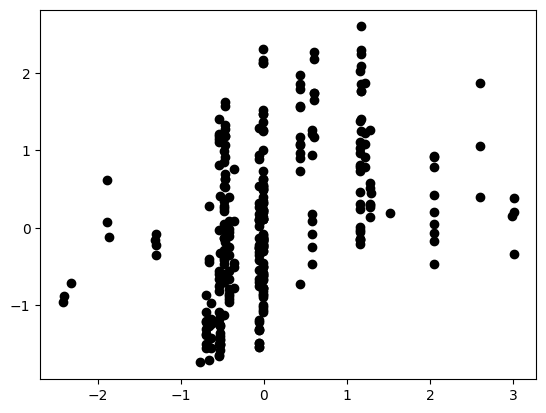

Min:  -2.4180782347764493 Max:  3.003628655003077 Mean:  0.07635275488501456 Std:  0.8483729929348606


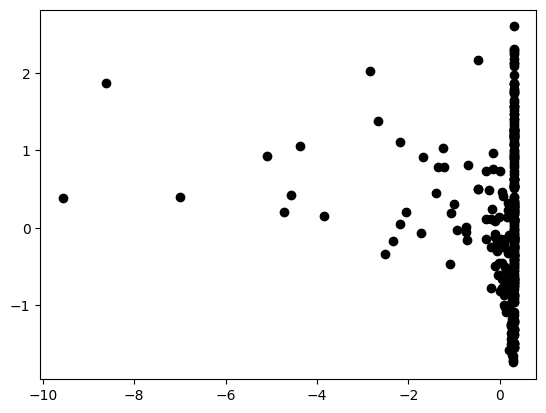

Min:  -9.56460780170171 Max:  0.3018287979994925 Mean:  -0.048820874025829845 Std:  1.1350806158275246


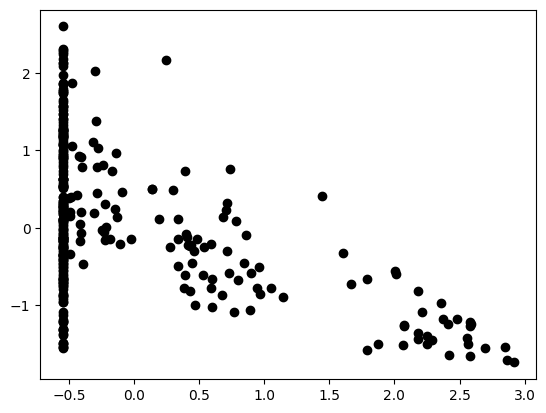

Min:  -0.5468695133249655 Max:  2.9159922635505406 Mean:  -0.04708961331341326 Std:  0.9053823570166117


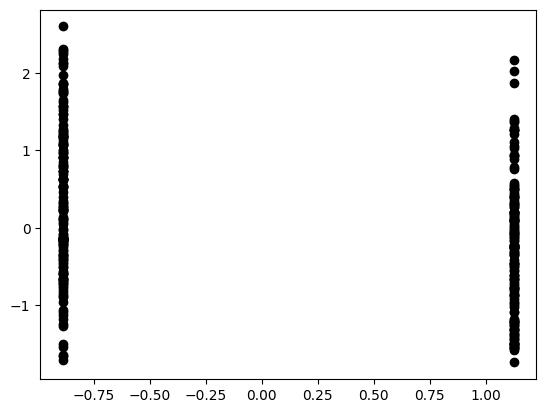

Min:  -0.8883028213312057 Max:  1.1257423105657 Mean:  0.10894279746815141 Std:  1.0069750672993831


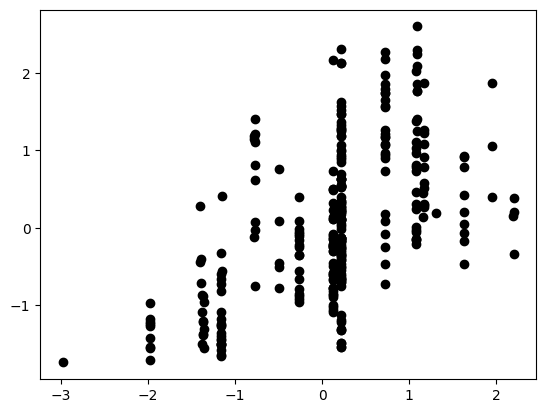

Min:  -2.975381915170502 Max:  2.1975730912209976 Mean:  0.12198837542361975 Std:  0.8665412840955791


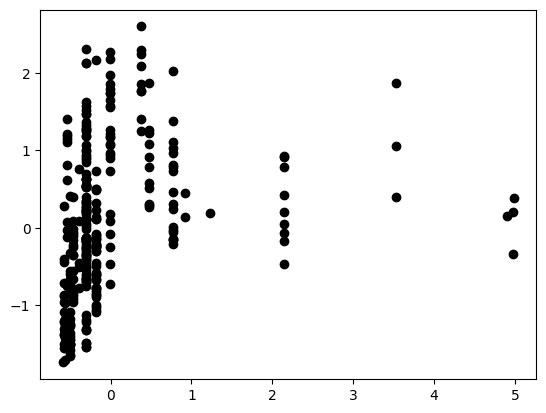

Min:  -0.5902115779847499 Max:  4.984048524158861 Mean:  -0.017218387970095037 Std:  0.8576571636280078


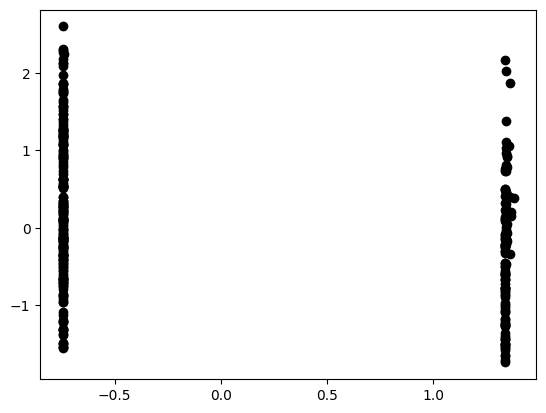

Min:  -0.7446430601326914 Max:  1.379972490203371 Mean:  0.03920779556756925 Std:  1.0104765873572037


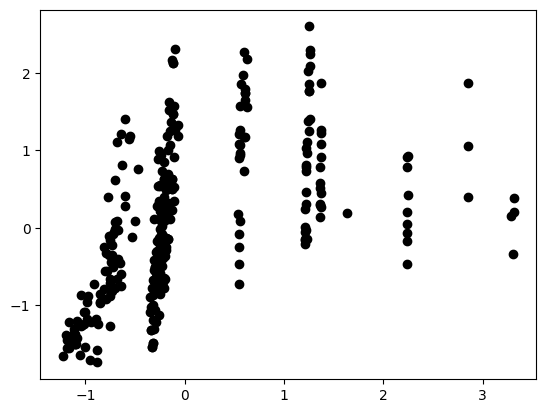

Min:  -1.2286815803582571 Max:  3.313749433393702 Mean:  0.021947182953945873 Std:  0.9202282210839207


In [36]:
for i in range(tester.X_test.shape[1],tester.new_X_test.shape[1]):
    plt.clf()
    plt.scatter(tester.new_X_test[:,i], tester.y_test, color = 'black')
    plt.show()
    print("Min: ", tester.new_X_test[:, i].min(), "Max: ", tester.new_X_test[:, i].max(), "Mean: ", tester.new_X_test[:, i].mean(), "Std: ", tester.new_X_test[:, i].std())